<a href="https://colab.research.google.com/github/Raniaaaaa8/Sarcasm-Detection-Tensorflow/blob/master/farasa_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install pyarabic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 7.6 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 50.6 MB/s 
     |████████████████████████████████| 6.6 MB 35.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 7.8 MB/s 


# Imports

In [ ]:
import re
import time
import aranorm
import random
import numpy as np
import pandas as pd
import seaborn as sns
import preprocess_arabert
from sklearn.model_selection import train_test_split

In [ ]:


seed=42
random.seed(seed)



In [ ]:
df= pd.read_csv("./sample_data/ArSarcasm_train.csv")

In [ ]:
df.head()

,dialect,sarcasm,sentiment,original_sentiment,tweet,source
0,gulf,False,negative,negative,"""نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ...",semeval
1,msa,False,neutral,positive,"""#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة...",semeval
2,egypt,False,neutral,neutral,"""@Alito_NBA اتوقع انه بيستمر""",semeval
3,levant,True,neutral,negative,"""@KSA24 يعني ""بموافقتنا"" لأن دمشق صايرة موسكو""",semeval
4,msa,False,neutral,negative,"""RT @alaahmad20: قائد في الحرس يعترف بفقدان ال...",semeval


In [ ]:
print("DataFrame Shape:",df.shape,"\n")
print("  DataFrame Info","\n","-"*20)
df.info()
print("")

DataFrame Shape: (8437, 6) 

  DataFrame Info 
 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8437 entries, 0 to 8436
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   dialect             8437 non-null   object
 1   sarcasm             8437 non-null   bool  
 2   sentiment           8437 non-null   object
 3   original_sentiment  8437 non-null   object
 4   tweet               8437 non-null   object
 5   source              8437 non-null   object
dtypes: bool(1), object(5)
memory usage: 337.9+ KB



In [ ]:
df[df.isnull().any(axis=1)]

,dialect,sarcasm,sentiment,original_sentiment,tweet,source


In [ ]:
tweets = list(df["tweet"])

In [ ]:
s=time.time()
text_preprocessed = [preprocess_arabert.preprocess(txt, do_farasa_tokenization=True) for txt in tweets] 
text_preprocessed=[aranorm.normalize_arabic_text(txt) for txt in text_preprocessed]
e=time.time()
print((e-s)/60,"  Minutes")


0.018756242593129475   Minutes


In [ ]:
tweets[:5]

['"نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما كنّا متوقعين الله يرحم ايامات السيقا والفاميلي #SuperMarioRun"',
 '"#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة_الصحراء  👑https://t.co/fVtn489TUS@nadinenjeim @MarieClaire_AR"',
 '"@Alito_NBA اتوقع انه بيستمر"',
 '"@KSA24 يعني "بموافقتنا" لأن دمشق صايرة موسكو"',
 '"RT @alaahmad20: قائد في الحرس يعترف بفقدان السيطرة الأمنية في شرقي وغربي إيران - أحوازنا#الأحواز #السعودية @abo_asseel @spagov  https:/…"']

In [ ]:
text_preprocessed[:5]

['نصيحه ما عمرك اتنزل لعبه سوبر ماريو مش زي ما كنا متوقعين الله يرحم ايامات السيقا والفاميلي',
 'نادين نسيب نجيم مجله ماري كلير ملكه الصحراء',
 'اتوقع انه بيستمر',
 'يعني بموافقتنا لان دمشق صايره موسكو',
 'قاءد في الحرس يعترف بفقدان السيطره الامنيه في شرقي وغربي ايران احوازنا الاحواز السعوديه']

In [ ]:
df["text_preprocessed"]=text_preprocessed

In [ ]:
df.sample(5)

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed
3053,msa,False,neutral,neutral,نظرة هادئة لمشهد ملتهبمقال اليوم أجيب فيه عمن ...,astd,نظره هادءه لمشهد ملتهبمقال اليوم اجيب فيه عمن ...
7077,msa,False,positive,positive,"""استقبل مدير الجامعة ........ فازا بالمركزين ا...",semeval,استقبل مدير الجامعه فازا بالمركزين الاول والثا...
1560,msa,False,neutral,neutral,"""صعبة النغمّ مآ يحن على غيآب الوتر. #اليسا""",semeval,صعبه النغم ما يحن علي غياب الوتر اليسا
1243,gulf,True,negative,negative,"""ريكي مارتن خطب واحد لبناني وحاجة أخر 💩💩💩""",semeval,ريكي مارتن خطب واحد لبناني وحاجه اخر
4546,msa,False,neutral,neutral,"""شاهد الموقف المحرج الذي حدث خلال حفل توزيع جو...",semeval,شاهد الموقف المحرج الذي حدث خلال حفل توزيع جوا...


In [ ]:
print("DataFrame Shape:",df.shape,"\n")
print("  DataFrame Info","\n","-"*20)
df.info()
print("")

DataFrame Shape: (8437, 7) 

  DataFrame Info 
 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8437 entries, 0 to 8436
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   dialect             8437 non-null   object
 1   sarcasm             8437 non-null   bool  
 2   sentiment           8437 non-null   object
 3   original_sentiment  8437 non-null   object
 4   tweet               8437 non-null   object
 5   source              8437 non-null   object
 6   text_preprocessed   8437 non-null   object
dtypes: bool(1), object(6)
memory usage: 403.8+ KB



In [ ]:
df[df.isnull().any(axis=1)]

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed


In [ ]:
df.dialect.value_counts()

msa       5652
egypt     1904
levant     439
gulf       414
magreb      28
Name: dialect, dtype: int64

In [ ]:
df[df.duplicated(['text_preprocessed'])]

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed
596,msa,False,neutral,neutral,@_wajood_ هاري بوتر؟,semeval,هاري بوتر
665,msa,False,neutral,neutral,"""RT @DrOmaralmohamma: في معرض فرص العمل فن من ...",semeval,في معرض فرص العمل فن من فنون جذب العماله كما ل...
668,egypt,False,negative,negative,"""انا قد قلت لكم ان غوتشي بدت تستهبل قلت والا م...",semeval,انا قد قلت لكم ان غوتشي بدت تستهبل قلت والا ما...
896,msa,False,neutral,neutral,بهذه الخطوات تطبقين #مكياج #غوتشي لموسم خريف ش...,semeval,بهذه الخطوات تطبقين مكياج غوتشي لموسم خريف شتا...
942,egypt,False,neutral,neutral,"""@_NOLE1 اللي اعرفه يقدر فيدرر على نادال""",semeval,اللي اعرفه يقدر فيدرر علي نادال
...,...,...,...,...,...,...,...
8345,egypt,False,positive,positive,"""مهما بلغت لحاجة وخلقنة غوتشي الا انها مازالت ...",semeval,مهما بلغت لحاجه وخلقنه غوتشي الا انها مازالت ا...
8368,msa,False,neutral,neutral,"""تحميل نسخة ويندوز 10 الإنتربرايز تحديث 2016 +...",semeval,تحميل نسخه ويندوز الانتربرايز تحديث التفعيل
8412,msa,True,negative,negative,"""RT @AlghamdiProf: #هاهم اليهود يدرسون التوراة...",semeval,هاهم اليهود يدرسون التوراه حتي داخل اقسام الشر...
8417,msa,False,negative,neutral,"""@fans__14 مع ميسي فازوا على متصدر المجموعه ،ب...",semeval,مع ميسي فازوا علي متصدر المجموعه بدون ميسي حتي...


In [ ]:
duplicates=df[df.duplicated(['text_preprocessed'])]

In [ ]:
duplicates.sarcasm.value_counts()

False    282
True      39
Name: sarcasm, dtype: int64

In [ ]:
df_clean_prep= df.drop_duplicates('text_preprocessed').reset_index(drop=True)

In [ ]:
df_clean_prep[df_clean_prep.duplicated(['text_preprocessed'])]

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed


In [ ]:
df_clean_prep[df_clean_prep.isnull().any(axis=1)]

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed


In [ ]:
df_clean_prep.sample(5)

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed
5799,msa,False,neutral,positive,"""RT @WPhoneApps: سيتم الإعلان عن أهم المزايا ا...",semeval,سيتم الاعلان عن اهم المزايا القادمه في تحديثين...
3214,gulf,False,positive,neutral,"""طلبت هارديسك خارجي من امازون (52$)و جاني ذا ا...",semeval,طلبت هارديسك خارجي من امازون و جاني ذا الشي
6829,msa,False,neutral,neutral,احترامنا للجميع لكن من لديه مشكلة مع صوت عاقل ...,astd,احترامنا للجميع لكن من لديه مشكله مع صوت عاقل ...
1871,egypt,True,positive,negative,"""عمرو اديبشويه يمدحشويه يخبتلو حد نزل امام سيس...",semeval,عمرو اديبشويه يمدحشويه يخبتلو حد نزل امام سيسي...
4998,msa,False,neutral,neutral,"""كارلو انشلوتي : لم أكن قلق حول رحيل ليفاندوفي...",semeval,كارلو انشلوتي لم اكن قلق حول رحيل ليفاندوفيسكي...


In [ ]:
print("DataFrame Shape:",df_clean_prep.shape,"\n")
print("  DataFrame Info","\n","-"*20)
df_clean_prep.info()
print("")

DataFrame Shape: (8116, 7) 

  DataFrame Info 
 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   dialect             8116 non-null   object
 1   sarcasm             8116 non-null   bool  
 2   sentiment           8116 non-null   object
 3   original_sentiment  8116 non-null   object
 4   tweet               8116 non-null   object
 5   source              8116 non-null   object
 6   text_preprocessed   8116 non-null   object
dtypes: bool(1), object(6)
memory usage: 388.5+ KB



In [ ]:
keys_dictionary   = {0:False,1:True}

labels_dictionary = {False:0,True:1}
df_clean_prep['label'] = df_clean_prep['sarcasm'].apply(lambda x : labels_dictionary.get(x))

In [ ]:
df_clean_prep.head(5)

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed,label
0,gulf,False,negative,negative,"""نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ...",semeval,نصيحه ما عمرك اتنزل لعبه سوبر ماريو مش زي ما ك...,0
1,msa,False,neutral,positive,"""#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة...",semeval,نادين نسيب نجيم مجله ماري كلير ملكه الصحراء,0
2,egypt,False,neutral,neutral,"""@Alito_NBA اتوقع انه بيستمر""",semeval,اتوقع انه بيستمر,0
3,levant,True,neutral,negative,"""@KSA24 يعني ""بموافقتنا"" لأن دمشق صايرة موسكو""",semeval,يعني بموافقتنا لان دمشق صايره موسكو,1
4,msa,False,neutral,negative,"""RT @alaahmad20: قائد في الحرس يعترف بفقدان ال...",semeval,قاءد في الحرس يعترف بفقدان السيطره الامنيه في ...,0


In [ ]:
df_ = df_clean_prep.sample(frac=1).reset_index(drop=True)

In [ ]:
df_.head(5)

,dialect,sarcasm,sentiment,original_sentiment,tweet,source,text_preprocessed,label
0,egypt,False,negative,negative,"""@EGYPTAIR @amrmsalama الطيارة طلعت الساعة ٣٠'...",semeval,الطياره طلعت الساعه ياشويه كدابين ولا في اهتما...,0
1,msa,True,negative,negative,مدير جامعة الإمام يستنكر الثناء على #أردوغان و...,astd,مدير جامعه الامام يستنكر الثناء علي اردوغان وي...,1
2,msa,False,positive,positive,من أعذب مفردات #الحياة وأجملها هو #اعطاء العذر...,astd,من اعذب مفردات الحياه واجملها هو اعطاء العذر ل...,0
3,msa,False,neutral,neutral,"""5 حقائق عن ابل لم يخطروا على بال أحد من قبل !...",semeval,حقاءق عن ابل لم يخطروا علي بال احد من قبل,0
4,msa,False,neutral,negative,"""#الشهرة_الالكترونية ☀️☀️☀️#الأمم_المتحدة: قرا...",semeval,الشهره الالكترونيه الامم المتحده قرابه مليون ش...,0


In [ ]:
df_.to_csv('Cleaned_PreProcessed_Tweets_sarcasm_dataset.csv', encoding='utf-8',index = None, header=True)

In [ ]:
dfTotal=df_[["text_preprocessed","label"]]

In [ ]:
dfTotal.head()

,text_preprocessed,label
0,الطياره طلعت الساعه ياشويه كدابين ولا في اهتما...,0
1,مدير جامعه الامام يستنكر الثناء علي اردوغان وي...,1
2,من اعذب مفردات الحياه واجملها هو اعطاء العذر ل...,0
3,حقاءق عن ابل لم يخطروا علي بال احد من قبل,0
4,الشهره الالكترونيه الامم المتحده قرابه مليون ش...,0


In [ ]:
dfTotal.label.value_counts()

0    6818
1    1298
Name: label, dtype: int64

In [ ]:
def randomSampling_df(df,percent):
    text=[]
    label=[]
    for i in range(18):
        df2=df[df["label"]==i].sample(frac=percent)
        text.extend(list(df2["text_preprocessed"]))
        label.extend(list(df2["label"]))
    return text, label
        

In [ ]:
text,label=randomSampling_df(dfTotal,0.1)

In [ ]:
df_10_percent=pd.DataFrame([text,label], index=['text_preprocessed', 'label']).T

In [ ]:
df_10_percent.label.value_counts()

0    682
1    130
Name: label, dtype: int64

In [ ]:
df_10_percent= df_10_percent.sample(frac=1).reset_index(drop=True)

In [ ]:
df_10_percent.head()

,text_preprocessed,label
0,افضل طقم لروجر فيدرروفي الطقم البنك,0
1,حمص قبل قليل حلب سوريا طقس العرب الطقسطقس سوري...,0
2,مهضومين مع بعض و ناجحين بالتمثيل برافو رامي عياش,0
3,انا كمان اتابعها بس في الفتره الاخيره سارت كله...,0
4,ويكيليكس كلينتون اعترفت رسميا بدعم قطر والسعود...,0


In [ ]:
def random_split(data, features, output, fraction, seed=42):
    X_train, X_test, y_train, y_test = train_test_split(data[features],
                                                        data[output],
                                                        stratify = data[output],
                                                        random_state=seed,
                                                        train_size=fraction
                                                       )
    train_data = pd.DataFrame(data=X_train, columns=features)
    train_data[output] = y_train
    test_data = pd.DataFrame(data=X_test, columns=features)
    test_data[output] = y_test
    
    return train_data, test_data

In [ ]:
train_fraction = 0.80 
val_fraction   = 0.50   

output = 'label' 

features = dfTotal.columns.tolist()

features.remove(output)
print('output:', output)
print('features:', features)



output: label
features: ['text_preprocessed']


In [ ]:
dfTrain, tmp    = random_split(dfTotal, features, output, train_fraction, seed)
dfValid, dfTest = random_split(tmp, features, output, val_fraction, seed)

print(len(dfTrain))
print(len(dfValid))
print(len(dfTest))
print(len(dfTrain)+len(dfValid)+len(dfTest))
print(len(dfTotal))

6492
812
812
8116
8116


In [ ]:
dfTrain_10_percent, tmp_10_percent    = random_split(df_10_percent, features, output, train_fraction, seed)
dfValid_10_percent, dfTest_10_percent = random_split(tmp_10_percent, features, output, val_fraction, seed)

print(len(dfTrain_10_percent))
print(len(dfValid_10_percent))
print(len(dfTest_10_percent))
print(len(dfTrain_10_percent)+len(dfValid_10_percent)+len(dfTest_10_percent))
print(len(df_10_percent))

649
81
82
812
812


In [ ]:
dfTrain.reset_index(drop=True,inplace=True)
dfValid.reset_index(drop=True,inplace=True)
dfTest.reset_index(drop=True,inplace=True)

dfTrain_10_percent.reset_index(drop=True,inplace=True)
dfValid_10_percent.reset_index(drop=True,inplace=True)
dfTest_10_percent.reset_index(drop=True,inplace=True)

In [ ]:
dfTrain.head()

,text_preprocessed,label
0,من انت احمد الشيخ فلسطين لاجء حق العوده الوطن ...,0
1,اول بوكيمون حطيته فالجيم بتاريخ,0
2,احمد الشيخ امبارح بغد ماسجل الجول عمل تحدي الم...,0
3,وجاء مرسي وخطب في الناس بدون حمايه منظر راءع ش...,0
4,السيسي يشرف علي اصدار اغرب تاريخ بعد ان جعل حر...,0


In [ ]:
print("trainData")
pd.DataFrame(data=np.column_stack((dfValid.label.value_counts(), (dfValid.label.value_counts()/len(dfValid)*100))),columns=['Values','Percentage'])

trainData


,Values,Percentage
0,682.0,83.990148
1,130.0,16.009852


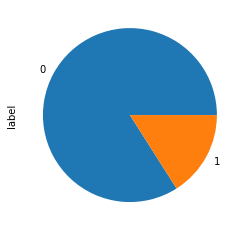

In [ ]:
dfTrain.label.value_counts().plot(kind='pie');

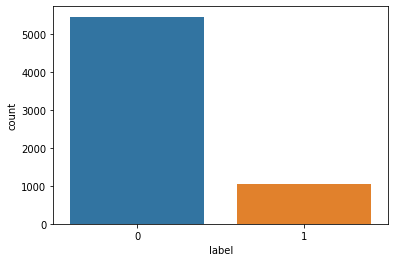

In [ ]:
sns.countplot(x="label",data=dfTrain);

In [ ]:
dfValid.head()
#67

,text_preprocessed,label
0,لوحه جميله لجسر في الشتاء باريس لوحه فرنسا ثقا...,0
1,مصر لن تركع مصر راكعه ومنفقصه من زمان والفيران...,1
2,بعد ساعه مناظره هيلاري كلينتون و دونالد ترامب,0
3,مساء النور حبيب القلب رامي عياش امير الليل,0
4,نون اون لاين اسراءيل تطلق اسم بيريز علي مفاعل ...,0


In [ ]:
print("validData")
pd.DataFrame(data=np.column_stack((dfValid.label.value_counts(), (dfValid.label.value_counts()/len(dfValid)*100))),columns=['Values','Percentage'])

validData


,Values,Percentage
0,682.0,83.990148
1,130.0,16.009852


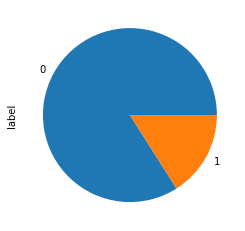

In [ ]:
dfValid.label.value_counts().plot(kind='pie');

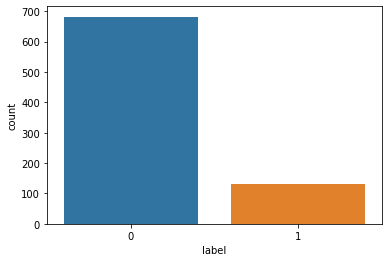

In [ ]:
sns.countplot(x="label",data=dfValid);

In [ ]:
dfTest.head()

,text_preprocessed,label
0,ميريام فارس تشارك جمهورها بفيديو جديد لابنها ف...,0
1,الشهره الالكترونيه الامم المتحده قرابه مليون ش...,0
2,زلزال بقوه درجات يهز اليابان وتحذيرات من تسونا...,0
3,مج له الذهبيه نوال الزغبي بسحر جمالها الذهبي ف...,0
4,موقع طقس العرب مش مسترجي يحط حاله الطقس لعشره ...,1


In [ ]:
print("testData")
pd.DataFrame(data=np.column_stack((dfTest.label.value_counts(), (dfTest.label.value_counts()/len(dfTest)*100))),columns=['Values','Percentage'])

testData


,Values,Percentage
0,682.0,83.990148
1,130.0,16.009852


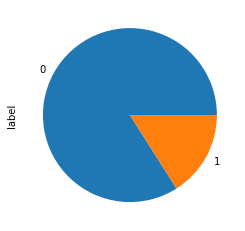

In [ ]:
dfTest.label.value_counts().plot(kind='pie');

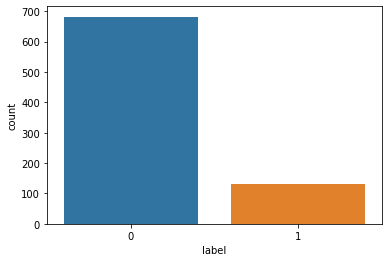

In [ ]:
sns.countplot(x="label",data=dfTest);

In [ ]:


dfTrain.to_csv('preProcessedTweets_trainF.csv', encoding='utf-8',index = None, header=True)
dfValid.to_csv('preProcessedTweets_validF.csv', encoding='utf-8',index = None, header=True)
dfTest.to_csv('preProcessedTweets_testF.csv'  , encoding='utf-8',index = None, header=True)



In [ ]:


dfTrain_10_percent.to_csv('preProcessedTweets_trainF_10_percent.csv', encoding='utf-8',index = None, header=True)
dfValid_10_percent.to_csv('preProcessedTweets_validF_10_percent.csv', encoding='utf-8',index = None, header=True)
dfTest_10_percent.to_csv('preProcessedTweets_testF_10_percent.csv'  , encoding='utf-8',index = None, header=True)

